In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
scDNA = pd.read_csv('scDNA_gene_by_cell.csv', sep='\t')
scDNA.head()

,chromosome_name,start_position,end_position,ensembl_gene_id,hgnc_symbol,20172,9318,3122,5649,20153,...,19355,19384,19477,5262,19844,20027,20062,20096,20123,20149
0,1,14404,29570,ENSG00000227232,WASH7P,3.753906,0.0,0.0,9.765625,6.0,...,2.0,1.871094,1.386719,2.0,1.375,1.625,1.0,2.039062,2.0,0.019531
1,1,868071,876903,ENSG00000230368,FAM41C,3.753906,0.0,0.0,9.765625,6.0,...,2.0,1.871094,1.386719,2.0,1.375,1.625,1.0,2.039062,2.0,0.019531
2,1,944204,959309,ENSG00000188976,NOC2L,3.753906,0.0,0.0,9.765625,6.0,...,2.0,1.871094,1.386719,2.0,1.375,1.625,1.0,2.039062,2.0,0.019531
3,1,1001138,1014541,ENSG00000187608,ISG15,3.753906,0.0,0.0,9.765625,6.0,...,2.0,1.871094,1.386719,2.0,1.375,1.625,1.0,2.039062,2.0,0.019531
4,1,1020123,1056118,ENSG00000188157,AGRN,3.753906,0.0,0.0,9.765625,6.0,...,2.0,1.871094,1.386719,2.0,1.375,1.625,1.0,2.039062,2.0,0.019531


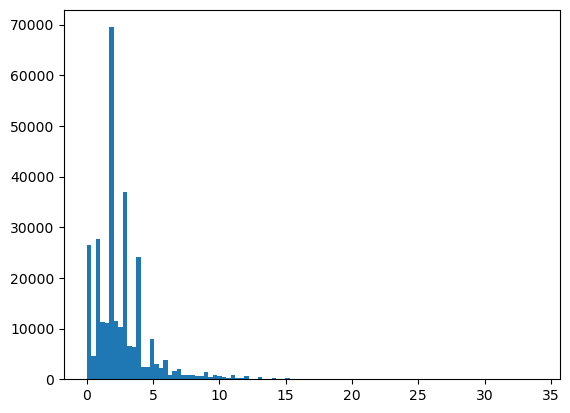

In [3]:
plt.hist(np.array(scDNA.iloc[:, 5:]).flatten(), bins = 100);

In [4]:
scRNA_CNV = pd.read_csv('scaled.sl.avg.csv')
scRNA_CNV.head()

,Unnamed: 0,normal1,normal2,normal3,normal4,normal5,normal6,normal7,normal8,normal9,...,PT039_P10_H03_S279,PT039_P10_H04_S280,PT039_P10_H05_S281,PT039_P10_H06_S282,PT039_P10_H07_S283,PT039_P10_H08_S284,PT039_P10_H09_S285,PT039_P10_H10_S286,PT039_P10_H11_S287,PT039_P10_H12_S288
0,A2M,0.000299,-0.015708,-0.039177,-0.060629,-0.043851,0.014317,-0.036646,0.032175,-0.030945,...,0.014416,-0.033787,0.008417,0.043997,-0.026707,-0.006418,0.018732,0.088070,0.009326,0.021852
1,AAGAB,-0.001465,-0.018433,-0.035471,-0.060559,-0.045756,0.011341,-0.038611,0.031932,-0.027205,...,0.013343,-0.031855,0.007302,0.047544,-0.026741,-0.008120,0.010725,0.093840,0.017358,0.019663
2,AAK1,-0.002462,-0.021054,-0.035224,-0.059066,-0.045702,0.012251,-0.037511,0.033284,-0.028106,...,0.011605,-0.033153,0.005524,0.045615,-0.030433,-0.004980,0.012020,0.091011,0.014858,0.018501
3,AAMP,0.002955,-0.010189,-0.027140,-0.060845,-0.043985,0.013213,-0.037535,0.041653,-0.020673,...,0.008556,-0.033124,0.002436,0.042383,-0.032884,-0.008514,0.002146,0.086911,0.011076,0.012278
4,AARS,-0.000968,-0.012865,-0.029935,-0.061219,-0.043965,0.010419,-0.030830,0.037071,-0.023479,...,0.008851,-0.032467,0.002695,0.042502,-0.034447,-0.011496,-0.005432,0.086195,0.010665,0.012423


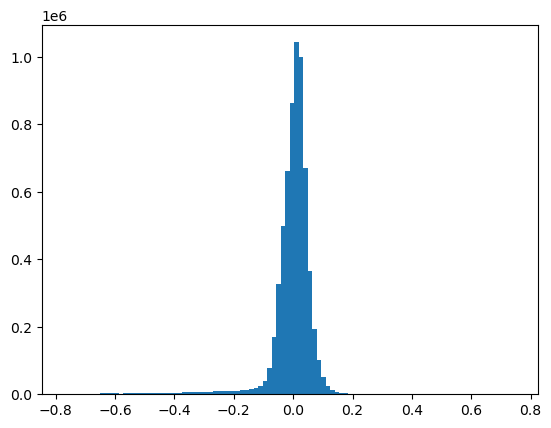

In [5]:
plt.hist(np.array(scRNA_CNV.iloc[:, 7:]).flatten(), bins = 100);

In [6]:
print(scDNA.shape)
print(scRNA_CNV.shape)

(9170, 37)
(3610, 1777)


In [17]:
set1 = set(scRNA_CNV.loc[:,'Unnamed: 0'])
set2 = set(scDNA.loc[:,'hgnc_symbol'])
iset = set1.intersection(set2)
len(iset)

3188

In [23]:
scRNA_CNV_new = scRNA_CNV[scRNA_CNV['Unnamed: 0'].isin(iset)]
scRNA_CNV_new.sort_values("Unnamed: 0",inplace=True) 
scRNA_CNV_new

/var/folders/sq/2cxnps7s2n30yvs0mnt35vb40000gq/T/ipykernel_43123/2373482304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scRNA_CNV_new.sort_values("Unnamed: 0",inplace=True)


,Unnamed: 0,normal1,normal2,normal3,normal4,normal5,normal6,normal7,normal8,normal9,...,PT039_P10_H03_S279,PT039_P10_H04_S280,PT039_P10_H05_S281,PT039_P10_H06_S282,PT039_P10_H07_S283,PT039_P10_H08_S284,PT039_P10_H09_S285,PT039_P10_H10_S286,PT039_P10_H11_S287,PT039_P10_H12_S288
0,A2M,0.000299,-0.015708,-0.039177,-0.060629,-0.043851,0.014317,-0.036646,0.032175,-0.030945,...,0.014416,-0.033787,0.008417,0.043997,-0.026707,-0.006418,0.018732,0.088070,0.009326,0.021852
1,AAGAB,-0.001465,-0.018433,-0.035471,-0.060559,-0.045756,0.011341,-0.038611,0.031932,-0.027205,...,0.013343,-0.031855,0.007302,0.047544,-0.026741,-0.008120,0.010725,0.093840,0.017358,0.019663
2,AAK1,-0.002462,-0.021054,-0.035224,-0.059066,-0.045702,0.012251,-0.037511,0.033284,-0.028106,...,0.011605,-0.033153,0.005524,0.045615,-0.030433,-0.004980,0.012020,0.091011,0.014858,0.018501
3,AAMP,0.002955,-0.010189,-0.027140,-0.060845,-0.043985,0.013213,-0.037535,0.041653,-0.020673,...,0.008556,-0.033124,0.002436,0.042383,-0.032884,-0.008514,0.002146,0.086911,0.011076,0.012278
4,AARS,-0.000968,-0.012865,-0.029935,-0.061219,-0.043965,0.010419,-0.030830,0.037071,-0.023479,...,0.008851,-0.032467,0.002695,0.042502,-0.034447,-0.011496,-0.005432,0.086195,0.010665,0.012423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,ZSWIM7,0.041306,-0.001269,-0.011860,-0.037124,-0.032882,-0.035546,-0.021174,-0.023725,-0.023712,...,0.005739,-0.056201,-0.014259,-0.011614,-0.045145,-0.150973,-0.248032,0.021620,0.075091,-0.180314
3606,ZXDC,0.044094,-0.008957,-0.010418,-0.038155,-0.037078,-0.036539,-0.018996,-0.039204,-0.032303,...,0.007223,-0.055459,-0.014819,-0.010898,-0.043848,-0.149039,-0.244695,0.022978,0.067052,-0.182119
3607,ZYG11A,0.048941,-0.006156,-0.007203,-0.035452,-0.035082,-0.034579,-0.016735,-0.035975,-0.029611,...,0.005689,-0.057764,-0.016615,-0.013229,-0.043635,-0.149798,-0.242690,0.021313,0.067333,-0.189331
3608,ZYG11B,0.050129,-0.006296,-0.003864,-0.034567,-0.033009,-0.032543,-0.014387,-0.034545,-0.029863,...,0.006084,-0.058170,-0.016493,-0.013662,-0.059068,-0.149611,-0.255954,0.021571,0.058466,-0.197065


In [24]:
scDNA_new = scDNA[scDNA['hgnc_symbol'].isin(iset)]
scDNA_new.sort_values('hgnc_symbol',inplace=True) 
scDNA_new

/var/folders/sq/2cxnps7s2n30yvs0mnt35vb40000gq/T/ipykernel_43123/2093679419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scDNA_new.sort_values('hgnc_symbol',inplace=True)


,chromosome_name,start_position,end_position,ensembl_gene_id,hgnc_symbol,20172,9318,3122,5649,20153,...,19355,19384,19477,5262,19844,20027,20062,20096,20123,20149
5413,12,9067664,9116229,ENSG00000175899,A2M,4.882812,0.000000,0.000000,12.339844,1.320312,...,1.968750,1.933594,1.945312,0.0,1.953125,0.226562,0.992188,1.605469,1.921875,1.683594
6442,15,67201033,67255195,ENSG00000103591,AAGAB,5.007812,0.000000,8.859375,8.199219,3.179688,...,2.000000,2.000000,2.000000,3.0,1.957031,2.957031,1.000000,0.882812,2.773438,1.257812
1162,2,69457997,69674349,ENSG00000115977,AAK1,4.882812,16.000000,0.000000,9.804688,6.000000,...,2.000000,2.000000,2.000000,2.0,1.742188,1.382812,0.996094,1.695312,1.000000,1.000000
1520,2,218264123,218270257,ENSG00000127837,AAMP,4.804688,1.800781,0.000000,7.023438,8.972656,...,2.000000,2.000000,1.960938,2.0,1.898438,2.000000,1.000000,1.347656,0.976562,1.062500
6886,16,70252295,70289543,ENSG00000090861,AARS,4.910156,0.000000,8.664062,4.066406,2.000000,...,2.011719,2.007812,2.007812,1.0,1.972656,1.949219,1.000000,1.683594,1.000000,0.386719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,17,15976560,15999717,ENSG00000214941,ZSWIM7,3.398438,11.804688,0.000000,6.800781,0.000000,...,1.980469,2.000000,1.000000,1.0,1.187500,1.574219,0.949219,1.019531,2.113281,1.125000
1930,3,126437601,126475919,ENSG00000070476,ZXDC,4.847656,0.000000,5.832031,0.000000,5.000000,...,2.000000,2.000000,1.980469,2.0,2.000000,2.523438,1.003906,1.074219,1.000000,2.128906
343,1,52842511,52894998,ENSG00000203995,ZYG11A,4.003906,21.066406,0.000000,11.511719,4.703125,...,2.000000,2.000000,2.000000,2.0,1.496094,1.859375,1.000000,2.382812,2.000000,0.378906
342,1,52726467,52827342,ENSG00000162378,ZYG11B,4.003906,21.066406,0.000000,11.511719,4.703125,...,2.000000,2.000000,2.000000,2.0,1.496094,1.859375,1.000000,2.382812,2.000000,0.378906


In [103]:
print(np.where(scDNA_new.columns == '19355'))
scDNA_new.iloc[:, 27]

(array([27]),)


5413    1.968750
6442    2.000000
1162    2.000000
1520    2.000000
6886    2.011719
          ...   
7071    1.980469
1930    2.000000
343     2.000000
342     2.000000
3786    2.000000
Name: 19355, Length: 3188, dtype: float64

In [102]:
log_scDNA_arr.shape

(3188, 32)

In [116]:
print(np.where(scDNA_new.columns == '9318'))

(array([6]),)


In [124]:
print(np.where(scDNA_new.columns == '3122'))
print(np.where(scDNA_new.columns == '5649'))
print(np.where(scDNA_new.columns == '6828'))

(array([7]),)
(array([8]),)
(array([21]),)


In [104]:
log_scDNA_arr[:, 22]

array([0.12093011, 0.13667847, 0.13667847, ..., 0.13667847, 0.13667847,
       0.13667847])

In [54]:
scDNA_arr = np.array(scDNA_new.iloc[:, 5:])
scDNA_arr[scDNA_arr<=0] = 0.00390625
scDNA_arr[np.isnan(scDNA_arr)] = 0.00390625
log_scDNA_arr = np.log(scDNA_arr)
log_scDNA_arr.shape

(3188, 32)

In [55]:
log_scDNA_arr.mean(axis=0)

array([ 1.46222005, -2.1415911 , -2.62185702, -0.09107662, -0.16866264,
        0.98760427,  1.14249284,  1.12381895,  1.06148843,  0.96380572,
        1.08356401,  0.88484306,  0.35533728,  0.29565011,  0.50465549,
       -1.34921949, -0.60729885, -0.04230593,  0.52228936,  0.42894954,
        0.55439359,  0.56556139,  0.55646871,  0.55447709,  0.52836034,
        0.05421263,  0.44938547,  0.1431747 , -0.11471275,  0.15297169,
        0.40503565,  0.06799807])

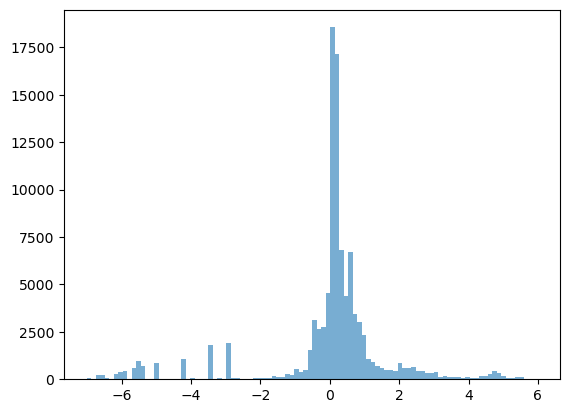

In [61]:
log_scDNA_arr = log_scDNA_arr - log_scDNA_arr.mean(axis=0)
plt.hist(log_scDNA_arr.flatten(), bins = 100, alpha = 0.6);

In [63]:
scRNA_CNV_arr = np.array(scRNA_CNV_new.iloc[:, 1:])
scRNA_CNV_arr.shape

(3188, 1776)

In [115]:
print(list(scRNA_CNV_new.columns[1:242]))

In [ ]:
# scRNA_CNV_arr
# log_scDNA_arr

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scRNA_CNV_arr.transpose())
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['cell'] = list(scRNA_CNV_new.columns[1:])
principalDf['type'] = np.append(np.repeat('normal ref', 240), np.repeat('experimental', 1536))
principalDf

,principal component 1,principal component 2,cell,type
0,7.391264,-1.608978,normal1,normal ref
1,7.242522,-0.810964,normal2,normal ref
2,8.091025,-0.963062,normal3,normal ref
3,8.079013,-0.839275,normal4,normal ref
4,7.838835,-0.459202,normal5,normal ref
...,...,...,...,...
1771,-0.409293,1.469374,PT039_P10_H08_S284,experimental
1772,-0.231771,2.173807,PT039_P10_H09_S285,experimental
1773,-2.075072,-0.638977,PT039_P10_H10_S286,experimental
1774,-3.054287,-1.449460,PT039_P10_H11_S287,experimental


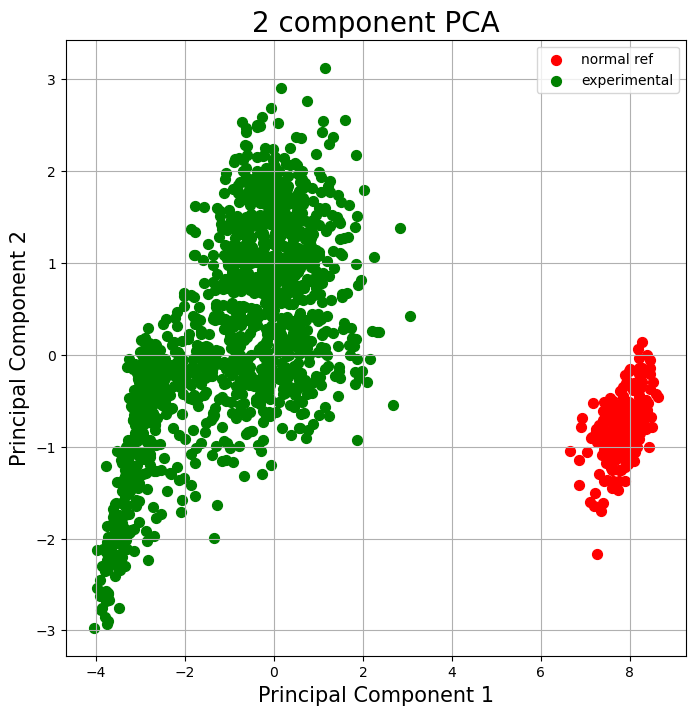

In [81]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['normal ref', 'experimental']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['type'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [82]:
principalComponents = pca.fit_transform(log_scDNA_arr.transpose())
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['cell'] = list(scDNA_new.columns[5:])
principalDf

,principal component 1,principal component 2,cell
0,-2.335248,-4.849120,20172
1,133.627987,164.590883,9318
2,144.581692,-69.929407,3122
3,-92.030656,23.925416,5649
4,25.759975,-69.620084,20153
5,-2.371439,-11.912425,20108
6,-2.081037,-5.070489,19885
7,-3.608556,-5.406630,19935
8,-0.317833,-5.889419,19963
9,-2.539025,-2.475077,19981


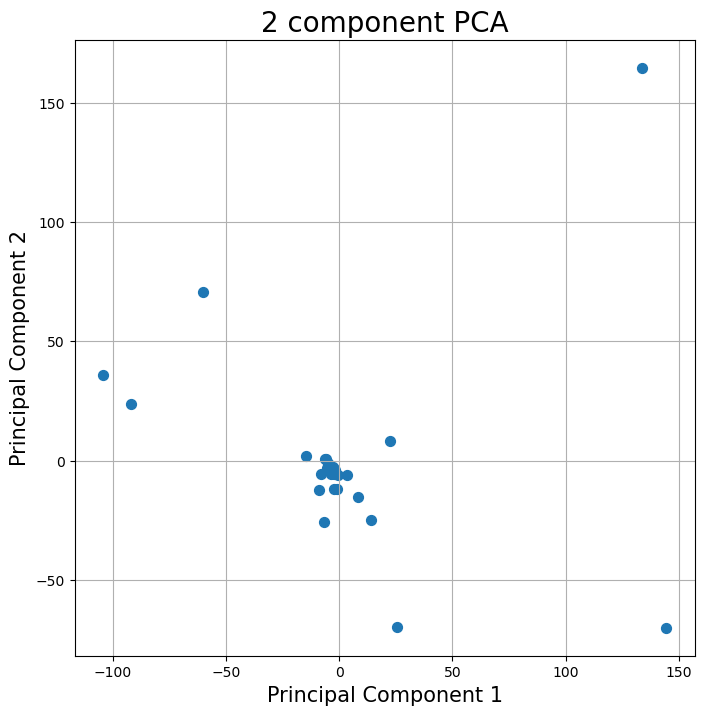

In [84]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b']
ax.scatter(principalDf.loc[:, 'principal component 1']
            , principalDf.loc[:, 'principal component 2']
            , s = 50)
ax.grid()

In [105]:
scRNA_CNV_arr.shape

(3188, 1776)

(array([ 1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  2.,
         1.,  2.,  1.,  3.,  8.,  5.,  4.,  8., 10.,  7.,  9.,  8., 16.,
         9., 10., 10., 12.,  8.,  5., 13.,  6., 10., 13.,  5., 11.,  7.,
         4.,  6.,  6.,  1.,  1.,  4.,  0.,  4.,  2.,  1.,  1.]),
 array([0.01302046, 0.01344978, 0.0138791 , 0.01430842, 0.01473774,
        0.01516706, 0.01559638, 0.0160257 , 0.01645502, 0.01688434,
        0.01731366, 0.01774298, 0.0181723 , 0.01860162, 0.01903094,
        0.01946026, 0.01988958, 0.0203189 , 0.02074822, 0.02117754,
        0.02160686, 0.02203618, 0.0224655 , 0.02289482, 0.02332414,
        0.02375346, 0.02418278, 0.0246121 , 0.02504142, 0.02547074,
        0.02590006, 0.02632938, 0.0267587 , 0.02718802, 0.02761734,
        0.02804666, 0.02847598, 0.0289053 , 0.02933462, 0.02976394,
        0.03019326, 0.03062258, 0.0310519 , 0.03148122, 0.03191054,
        0.03233986, 0.03276918, 0.0331985 , 0.03362782, 0.03405714,
        0.03448646]),
 <BarContainer

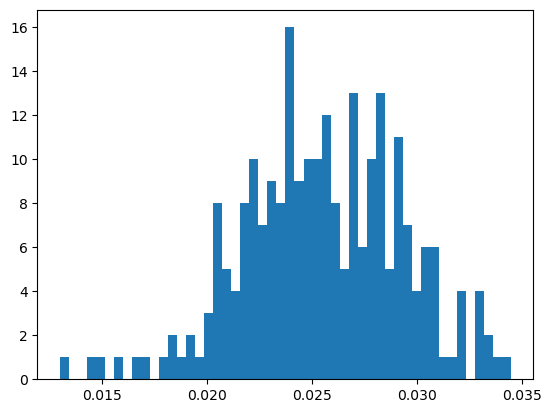

In [119]:
from scipy import spatial
# result = 1 - spatial.distance.cosine(dataSetI, dataSetII)
vecDNA = log_scDNA_arr[:, 22]
cos_sim = []
for i in range(scRNA_CNV_arr.shape[1]):
    cos_sim.append(1 - spatial.distance.cosine(vecDNA, scRNA_CNV_arr[:, i]))
plt.hist(cos_sim[:240], bins=50)

(array([  1.,   2.,   1.,   2.,   2.,   9.,   9.,  11.,   8.,  16.,  32.,
         24.,  36.,  44.,  65.,  64.,  96., 129., 193., 170., 107., 113.,
         70.,  56.,  56.,  39.,  28.,  22.,  22.,  14.,  17.,   9.,  10.,
         12.,  11.,   6.,   5.,   2.,   5.,   1.,   5.,   0.,   4.,   2.,
          1.,   0.,   1.,   3.,   0.,   1.]),
 array([-0.05387529, -0.05240352, -0.05093175, -0.04945998, -0.04798821,
        -0.04651644, -0.04504467, -0.0435729 , -0.04210113, -0.04062937,
        -0.0391576 , -0.03768583, -0.03621406, -0.03474229, -0.03327052,
        -0.03179875, -0.03032698, -0.02885521, -0.02738344, -0.02591167,
        -0.0244399 , -0.02296813, -0.02149636, -0.02002459, -0.01855282,
        -0.01708105, -0.01560928, -0.01413751, -0.01266574, -0.01119397,
        -0.0097222 , -0.00825043, -0.00677866, -0.00530689, -0.00383512,
        -0.00236335, -0.00089158,  0.00058019,  0.00205196,  0.00352373,
         0.0049955 ,  0.00646727,  0.00793904,  0.00941081,  0.01088258,
 

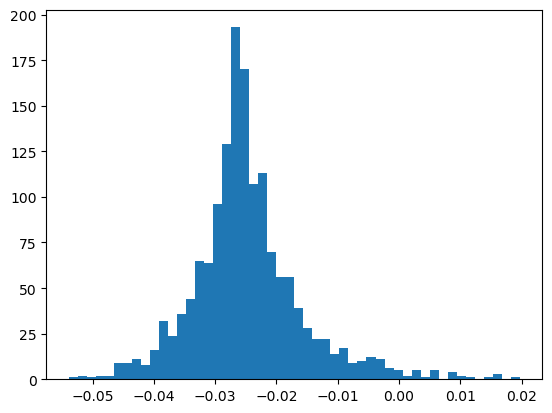

In [121]:
plt.hist(cos_sim[240:], bins=50)

(array([ 1.,  0.,  1.,  1.,  0.,  2.,  0.,  2.,  6.,  4.,  5.,  3.,  5.,
         6.,  4.,  5.,  7.,  7., 12., 11.,  9.,  8., 10.,  6., 10., 10.,
         5.,  8., 14.,  8.,  5., 13.,  9.,  8.,  2.,  3.,  7.,  2.,  7.,
         3.,  1.,  2.,  2.,  2.,  1.,  0.,  0.,  0.,  1.,  2.]),
 array([0.00072286, 0.00114592, 0.00156898, 0.00199205, 0.00241511,
        0.00283818, 0.00326124, 0.0036843 , 0.00410737, 0.00453043,
        0.00495349, 0.00537656, 0.00579962, 0.00622269, 0.00664575,
        0.00706881, 0.00749188, 0.00791494, 0.008338  , 0.00876107,
        0.00918413, 0.0096072 , 0.01003026, 0.01045332, 0.01087639,
        0.01129945, 0.01172251, 0.01214558, 0.01256864, 0.01299171,
        0.01341477, 0.01383783, 0.0142609 , 0.01468396, 0.01510703,
        0.01553009, 0.01595315, 0.01637622, 0.01679928, 0.01722234,
        0.01764541, 0.01806847, 0.01849154, 0.0189146 , 0.01933766,
        0.01976073, 0.02018379, 0.02060685, 0.02102992, 0.02145298,
        0.02187605]),
 <BarContainer

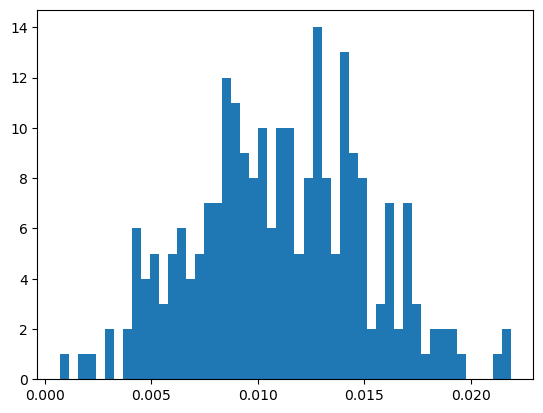

In [122]:
from scipy import spatial
# result = 1 - spatial.distance.cosine(dataSetI, dataSetII)
vecDNA = log_scDNA_arr[:, 1]
cos_sim = []
for i in range(scRNA_CNV_arr.shape[1]):
    cos_sim.append(1 - spatial.distance.cosine(vecDNA, scRNA_CNV_arr[:, i]))
plt.hist(cos_sim[:240], bins=50)

(array([  1.,   0.,   1.,   0.,   3.,   0.,   0.,   2.,   3.,   3.,   5.,
          5.,  13.,   6.,  14.,  30.,  21.,  35.,  55.,  55.,  97., 160.,
        196., 150., 119.,  98.,  75.,  71.,  64.,  49.,  47.,  29.,  26.,
         24.,  12.,  11.,  19.,   8.,   6.,   7.,   7.,   3.,   3.,   0.,
          0.,   0.,   1.,   0.,   0.,   2.]),
 array([-0.04479466, -0.04328671, -0.04177877, -0.04027082, -0.03876287,
        -0.03725492, -0.03574697, -0.03423902, -0.03273108, -0.03122313,
        -0.02971518, -0.02820723, -0.02669928, -0.02519133, -0.02368339,
        -0.02217544, -0.02066749, -0.01915954, -0.01765159, -0.01614364,
        -0.0146357 , -0.01312775, -0.0116198 , -0.01011185, -0.0086039 ,
        -0.00709595, -0.00558801, -0.00408006, -0.00257211, -0.00106416,
         0.00044379,  0.00195174,  0.00345968,  0.00496763,  0.00647558,
         0.00798353,  0.00949148,  0.01099943,  0.01250737,  0.01401532,
         0.01552327,  0.01703122,  0.01853917,  0.02004712,  0.02155506,
 

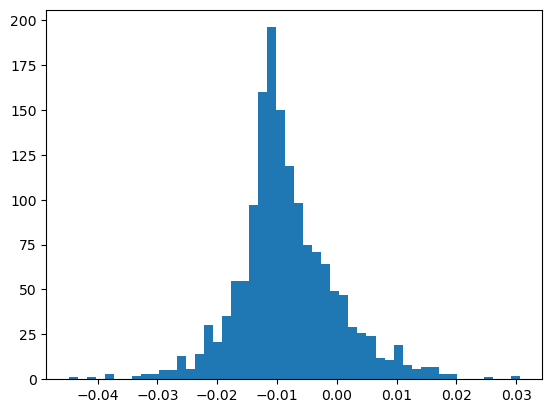

In [123]:
plt.hist(cos_sim[240:], bins=50)

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         2.,  2.,  1.,  5.,  3.,  5.,  4.,  4.,  5., 12., 14.,  7., 14.,
         9.,  6., 13.,  8.,  8., 16., 12., 14., 10., 11.,  7.,  7.,  5.,
         7.,  8.,  4.,  2.,  2.,  3.,  4.,  1.,  0.,  1.,  1.]),
 array([-0.00295029, -0.00231704, -0.00168379, -0.00105053, -0.00041728,
         0.00021598,  0.00084923,  0.00148248,  0.00211574,  0.00274899,
         0.00338225,  0.0040155 ,  0.00464875,  0.00528201,  0.00591526,
         0.00654852,  0.00718177,  0.00781502,  0.00844828,  0.00908153,
         0.00971479,  0.01034804,  0.01098129,  0.01161455,  0.0122478 ,
         0.01288106,  0.01351431,  0.01414757,  0.01478082,  0.01541407,
         0.01604733,  0.01668058,  0.01731384,  0.01794709,  0.01858034,
         0.0192136 ,  0.01984685,  0.02048011,  0.02111336,  0.02174661,
         0.02237987,  0.02301312,  0.02364638,  0.02427963,  0.02491288,
         0.02554614,  0.02617939,  0.02681265,  0.0274459 ,

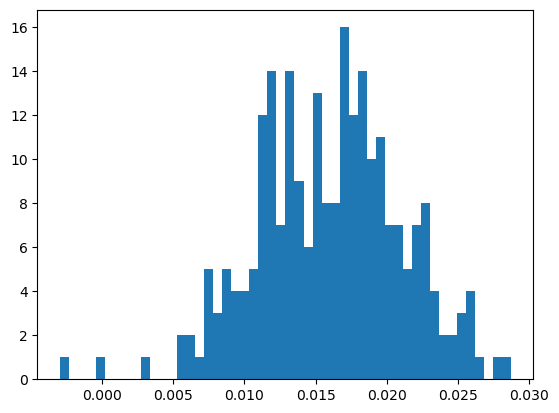

In [125]:
vecDNA = log_scDNA_arr[:, 2]
cos_sim = []
for i in range(scRNA_CNV_arr.shape[1]):
    cos_sim.append(1 - spatial.distance.cosine(vecDNA, scRNA_CNV_arr[:, i]))
plt.hist(cos_sim[:240], bins=50)

(array([  1.,   0.,   1.,   1.,   1.,   1.,   1.,   3.,   5.,  14.,  12.,
         20.,  23.,  48.,  43.,  56.,  71., 110., 199., 123.,  81.,  78.,
         64.,  56.,  59.,  56.,  37.,  43.,  38.,  48.,  33.,  31.,  30.,
         28.,  24.,  22.,  15.,   6.,  12.,   8.,   7.,  12.,   7.,   1.,
          0.,   2.,   1.,   2.,   1.,   1.]),
 array([-0.05374129, -0.05171261, -0.04968393, -0.04765524, -0.04562656,
        -0.04359788, -0.04156919, -0.03954051, -0.03751183, -0.03548315,
        -0.03345446, -0.03142578, -0.0293971 , -0.02736841, -0.02533973,
        -0.02331105, -0.02128236, -0.01925368, -0.017225  , -0.01519632,
        -0.01316763, -0.01113895, -0.00911027, -0.00708158, -0.0050529 ,
        -0.00302422, -0.00099553,  0.00103315,  0.00306183,  0.00509051,
         0.0071192 ,  0.00914788,  0.01117656,  0.01320525,  0.01523393,
         0.01726261,  0.0192913 ,  0.02131998,  0.02334866,  0.02537734,
         0.02740603,  0.02943471,  0.03146339,  0.03349208,  0.03552076,
 

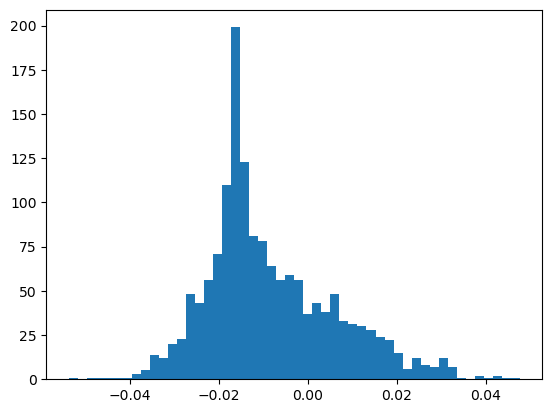

In [126]:
plt.hist(cos_sim[240:], bins=50)

(array([ 1.,  1.,  0.,  0.,  1.,  0.,  0.,  3.,  2.,  4.,  3.,  0.,  8.,
         4.,  3.,  4.,  8.,  6.,  6., 12., 14., 12.,  8., 12., 10.,  9.,
         5., 16., 11., 11., 10., 10.,  7.,  7.,  5.,  5.,  0.,  1.,  5.,
         1.,  3.,  3.,  2.,  2.,  1.,  1.,  0.,  1.,  1.,  1.]),
 array([-8.70476425e-03, -8.25145395e-03, -7.79814365e-03, -7.34483335e-03,
        -6.89152305e-03, -6.43821274e-03, -5.98490244e-03, -5.53159214e-03,
        -5.07828184e-03, -4.62497154e-03, -4.17166124e-03, -3.71835094e-03,
        -3.26504063e-03, -2.81173033e-03, -2.35842003e-03, -1.90510973e-03,
        -1.45179943e-03, -9.98489127e-04, -5.45178826e-04, -9.18685242e-05,
         3.61441777e-04,  8.14752079e-04,  1.26806238e-03,  1.72137268e-03,
         2.17468298e-03,  2.62799328e-03,  3.08130359e-03,  3.53461389e-03,
         3.98792419e-03,  4.44123449e-03,  4.89454479e-03,  5.34785509e-03,
         5.80116539e-03,  6.25447570e-03,  6.70778600e-03,  7.16109630e-03,
         7.61440660e-03,  8.0677

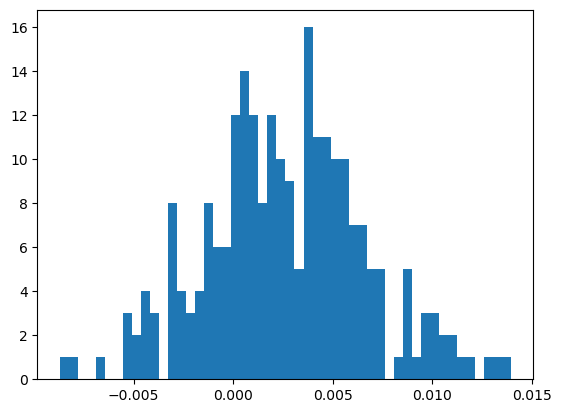

In [127]:
vecDNA = log_scDNA_arr[:, 3]
cos_sim = []
for i in range(scRNA_CNV_arr.shape[1]):
    cos_sim.append(1 - spatial.distance.cosine(vecDNA, scRNA_CNV_arr[:, i]))
plt.hist(cos_sim[:240], bins=50)

(array([  1.,   4.,   0.,   3.,   5.,   4.,   9.,  13.,  15.,   4.,  12.,
         17.,  19.,  30.,  28.,  28.,  25.,  39.,  40.,  35.,  44.,  37.,
         56.,  48.,  53.,  57.,  49.,  70.,  94., 127., 166.,  94.,  70.,
         51.,  41.,  38.,  33.,  24.,  14.,  12.,   8.,   5.,   2.,   4.,
          3.,   1.,   2.,   0.,   1.,   1.]),
 array([-0.04539133, -0.04398576, -0.04258019, -0.04117461, -0.03976904,
        -0.03836347, -0.0369579 , -0.03555232, -0.03414675, -0.03274118,
        -0.03133561, -0.02993004, -0.02852446, -0.02711889, -0.02571332,
        -0.02430775, -0.02290217, -0.0214966 , -0.02009103, -0.01868546,
        -0.01727988, -0.01587431, -0.01446874, -0.01306317, -0.01165759,
        -0.01025202, -0.00884645, -0.00744088, -0.0060353 , -0.00462973,
        -0.00322416, -0.00181859, -0.00041302,  0.00099256,  0.00239813,
         0.0038037 ,  0.00520927,  0.00661485,  0.00802042,  0.00942599,
         0.01083156,  0.01223714,  0.01364271,  0.01504828,  0.01645385,
 

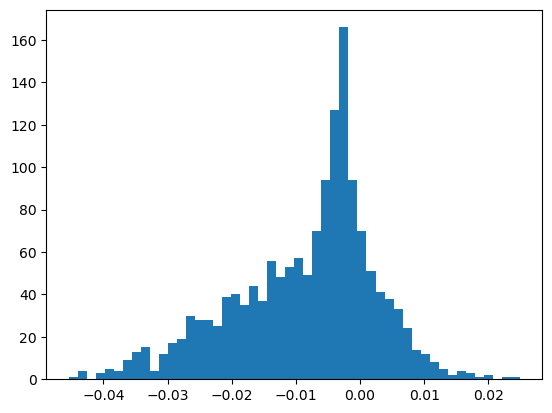

In [128]:
plt.hist(cos_sim[240:], bins=50)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  2.,  6.,  3.,  3.,  6.,  5.,  9.,  6., 12., 11., 12.,
        16., 16., 16., 14., 19., 16., 17., 12.,  7.,  4.,  4.,  2.,  7.,
         4.,  5.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.01341395, 0.01408074, 0.01474754, 0.01541433, 0.01608113,
        0.01674792, 0.01741472, 0.01808151, 0.0187483 , 0.0194151 ,
        0.02008189, 0.02074869, 0.02141548, 0.02208228, 0.02274907,
        0.02341587, 0.02408266, 0.02474945, 0.02541625, 0.02608304,
        0.02674984, 0.02741663, 0.02808343, 0.02875022, 0.02941702,
        0.03008381, 0.0307506 , 0.0314174 , 0.03208419, 0.03275099,
        0.03341778, 0.03408458, 0.03475137, 0.03541817, 0.03608496,
        0.03675175, 0.03741855, 0.03808534, 0.03875214, 0.03941893,
        0.04008573, 0.04075252, 0.04141932, 0.04208611, 0.0427529 ,
        0.0434197 , 0.04408649, 0.04475329, 0.04542008, 0.04608688,
        0.04675367]),
 <BarContainer

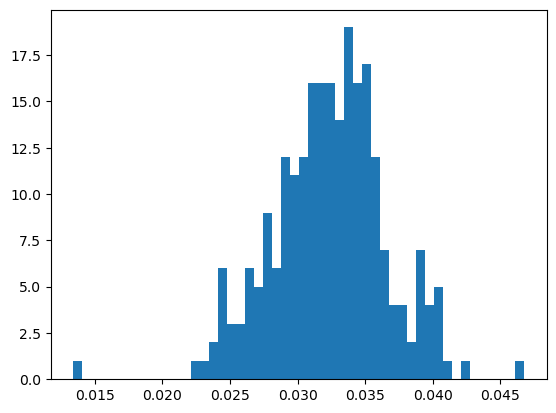

In [129]:
vecDNA = log_scDNA_arr[:, 16]
cos_sim = []
for i in range(scRNA_CNV_arr.shape[1]):
    cos_sim.append(1 - spatial.distance.cosine(vecDNA, scRNA_CNV_arr[:, i]))
plt.hist(cos_sim[:240], bins=50)

(array([  2.,   1.,   3.,   0.,   6.,   4.,  12.,  12.,  15.,  18.,  30.,
         34.,  53.,  45.,  59.,  58.,  77., 100., 120., 174., 200., 114.,
         69.,  64.,  62.,  38.,  37.,  36.,  24.,  18.,   8.,   4.,   3.,
          6.,   6.,   3.,   3.,   5.,   1.,   2.,   2.,   2.,   2.,   1.,
          0.,   1.,   0.,   1.,   0.,   1.]),
 array([-0.06737202, -0.06567529, -0.06397856, -0.06228183, -0.0605851 ,
        -0.05888837, -0.05719164, -0.05549491, -0.05379818, -0.05210145,
        -0.05040472, -0.04870799, -0.04701126, -0.04531453, -0.0436178 ,
        -0.04192106, -0.04022433, -0.0385276 , -0.03683087, -0.03513414,
        -0.03343741, -0.03174068, -0.03004395, -0.02834722, -0.02665049,
        -0.02495376, -0.02325703, -0.0215603 , -0.01986357, -0.01816684,
        -0.01647011, -0.01477337, -0.01307664, -0.01137991, -0.00968318,
        -0.00798645, -0.00628972, -0.00459299, -0.00289626, -0.00119953,
         0.0004972 ,  0.00219393,  0.00389066,  0.00558739,  0.00728412,
 

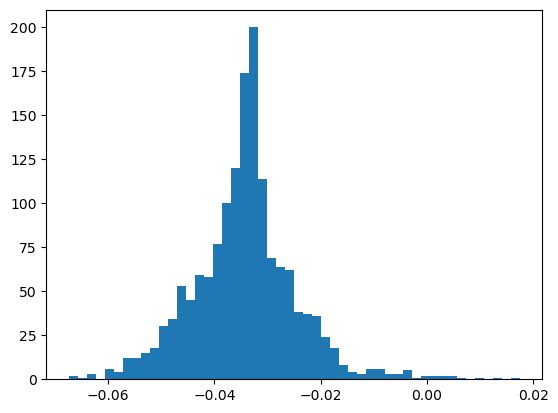

In [130]:
plt.hist(cos_sim[240:], bins=50)

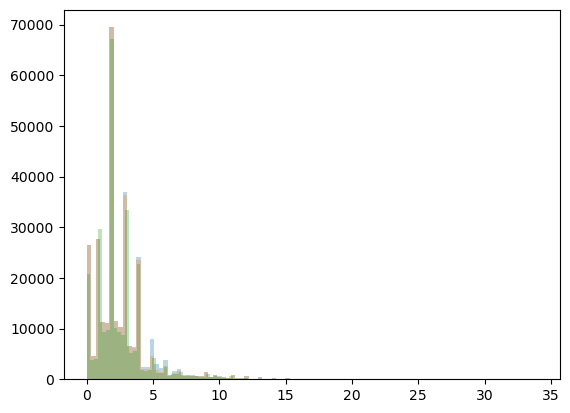

In [7]:
for i in range(5, 8):
    plt.hist(np.array(scDNA.iloc[:, i:]).flatten(), bins = 100, alpha = 0.3);

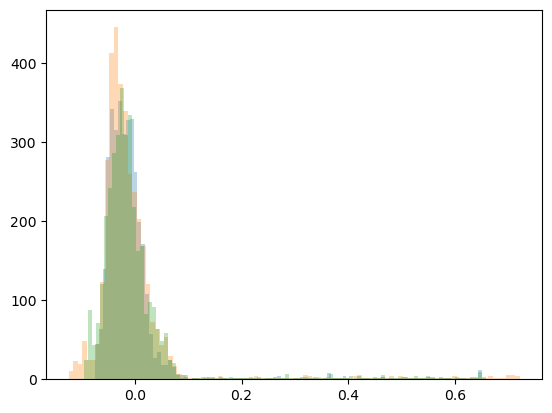

In [8]:
for i in range(7, 10):
    plt.hist(np.array(scRNA_CNV.iloc[:, i]).flatten(), bins = 100, alpha = 0.3);

In [9]:
from collections import Counter
cnter = dict(Counter(scDNA.iloc[:, 5]))
dictscDNA = sorted(cnter.items(), key=lambda d:d[1], reverse = True)
dictscDNA

[(5.0, 663),
 (3.0, 284),
 (4.9882812, 244),
 (4.9804688, 186),
 (4.8828125, 166),
 (5.03125, 161),
 (4.9921875, 144),
 (4.9960938, 138),
 (4.9726562, 136),
 (4.9101562, 122),
 (6.0, 118),
 (4.8554688, 110),
 (4.0, 103),
 (5.9921875, 102),
 (5.3632812, 102),
 (4.8046875, 88),
 (4.6171875, 86),
 (6.7304688, 80),
 (4.96875, 74),
 (5.2890625, 71),
 (4.0039062, 70),
 (6.7890625, 68),
 (4.984375, 66),
 (4.8242188, 65),
 (5.1953125, 65),
 (5.984375, 64),
 (4.2890625, 62),
 (5.96875, 62),
 (5.2851562, 61),
 (5.0078125, 60),
 (5.4414062, 59),
 (5.9765625, 55),
 (5.9414062, 54),
 (5.6601562, 53),
 (7.4570312, 53),
 (2.9648438, 52),
 (4.9765625, 51),
 (5.0625, 51),
 (4.90625, 50),
 (4.5664062, 49),
 (4.2460938, 49),
 (7.0351562, 48),
 (5.1992188, 48),
 (4.9414062, 47),
 (5.4296875, 47),
 (3.0039062, 47),
 (5.0039062, 46),
 (4.9375, 46),
 (4.7929688, 45),
 (5.5078125, 45),
 (3.984375, 44),
 (5.0195312, 44),
 (5.0390625, 44),
 (5.3359375, 42),
 (5.171875, 42),
 (5.1679688, 42),
 (5.3007812, 41),
 

In [10]:
cnter = dict(Counter(scRNA_CNV.iloc[:, 7]))
dictscRNA_CNV = sorted(cnter.items(), key=lambda d:d[1], reverse = True)
dictscRNA_CNV

[(-0.0373009286829242, 11),
 (-0.0632670651699409, 10),
 (-0.0188976105707894, 7),
 (-0.0075610599255513, 7),
 (-0.0577342506242364, 7),
 (0.0096581401131447, 7),
 (-0.0155283934883361, 7),
 (-0.039407105402915, 7),
 (0.0025818934013885, 7),
 (-0.005615393, 7),
 (-0.0495680554569483, 6),
 (-0.0186878234218022, 6),
 (-0.0258556114759561, 6),
 (-0.0462096067287507, 6),
 (-0.0481738982356984, 6),
 (-0.048956840847443, 6),
 (-0.0369772002054147, 6),
 (-0.0448892074641185, 6),
 (0.025873924800568, 6),
 (-0.0239092603343629, 6),
 (0.0321644257453833, 6),
 (-0.0533419490202557, 6),
 (0.0071824172895391, 6),
 (-0.032240586236605, 6),
 (-0.019796797144474, 6),
 (-0.0431799004722009, 6),
 (-0.005810602, 6),
 (0.00420548901688, 5),
 (0.0098494887378117, 5),
 (0.012408857550407, 5),
 (-0.0060405421779875, 5),
 (-0.0484317061877187, 5),
 (-0.0740200389645366, 5),
 (-0.0670563025892466, 5),
 (-0.0418859438587093, 5),
 (-0.0562626548528318, 5),
 (-0.0287835599548125, 5),
 (-0.0165659450860875, 5),
 (

In [11]:
# scRNA = pd.read_csv('scRNA_GSE118389_counts_rsem.txt', sep='\t')
# scRNA.head()
# plt.hist(np.array(scRNA).flatten(), range=(0, 1000), bins = 1000);
# plt.xlim(0, 1000);
# plt.ylim(0, 1e5);